In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('/home/beans/bespoke')

from constants import *
from imports import *
from traj_utils import *

In [3]:
len()

19472

In [2]:
SHOW_WORST_PROPS

['has_stop', 'has_lead', 'dagger_shift', 'lane_width', 'rd_is_lined']

In [3]:
AUX_PROPS

['speed',
 'has_map',
 'has_route',
 'pitch',
 'yaw',
 'tire_angle',
 'pos_x',
 'pos_y',
 'heading',
 'has_stop',
 'stop_dist',
 'has_lead',
 'lead_dist',
 'lead_speed',
 'should_yield',
 'dagger_shift',
 'lane_width',
 'rd_is_lined',
 'interesting_note',
 'frame_to_model_duration',
 'loop_duration',
 'num_sats',
 'gps_qual',
 'unc_p',
 'is_only_yellow_lined',
 'wide_shoulder_add',
 'maps_noise_mult',
 'roll_noise_mult',
 'te',
 'traj_max_angle_p',
 'ccs_p',
 'tire_angle_loss',
 'tire_angle_p',
 'left_turn',
 'right_turn',
 'ego_in_intx',
 'curvature_at_ego',
 'tire_angle_ap',
 'tire_angle_p_no_rc',
 'sss_p']

In [4]:
get_target_wp_dist(0)

5.0

In [5]:
mph_to_mps(10)

4.4704

In [6]:
%%time
get_obs_per_sec()

CPU times: user 3.75 ms, sys: 0 ns, total: 3.75 ms
Wall time: 3.69 ms


(41.44, 1.84)

In [7]:
%%time
sorted(glob.glob(f"{BLENDER_MEMBANK_ROOT}/dataloader_01/run_1275/aux/*"))

CPU times: user 443 µs, sys: 0 ns, total: 443 µs
Wall time: 522 µs


[]

In [5]:
for i in range(10_000):
    print(f"Obs per sec {get_obs_per_sec()[0]} || render time {get_render_time()[0]} || init time {get_init_time()[0]}" )
    time.sleep(60*1)

Obs per sec 21.38 || render time 67.84 || init time 3.11
Obs per sec 47.42 || render time 39.72 || init time 20.32
Obs per sec 44.35 || render time 45.77 || init time 9.02
Obs per sec 54.45 || render time 31.09 || init time 18.41
Obs per sec 42.72 || render time 40.72 || init time 6.42
Obs per sec 41.02 || render time 38.35 || init time 9.16
Obs per sec 47.82 || render time 44.52 || init time 11.74
Obs per sec 42.96 || render time 34.57 || init time 6.58
Obs per sec 49.51 || render time 35.26 || init time 16.58
Obs per sec 50.02 || render time 33.22 || init time 1.93
Obs per sec 40.26 || render time 35.88 || init time 10.59
Obs per sec 51.33 || render time 32.96 || init time 9.4
Obs per sec 48.57 || render time 30.33 || init time 11.16
Obs per sec 54.02 || render time 31.0 || init time 11.52


KeyboardInterrupt: 

In [4]:
for i in range(10_000):
    print(f"Obs per sec {get_obs_per_sec()[0]} || render time {get_render_time()[0]} || init time {get_init_time()[0]}" )
    time.sleep(60*1)

Obs per sec 34.55 || render time 50.2 || init time 18.94
Obs per sec 35.12 || render time 46.38 || init time 8.96
Obs per sec 39.65 || render time 44.3 || init time 17.02
Obs per sec 37.04 || render time 40.99 || init time 10.37
Obs per sec 43.07 || render time 41.37 || init time 17.4
Obs per sec 37.82 || render time 41.89 || init time 9.96
Obs per sec 38.69 || render time 44.32 || init time 13.04
Obs per sec 37.82 || render time 45.29 || init time 11.1
Obs per sec 38.53 || render time 42.94 || init time 13.68
Obs per sec 35.57 || render time 47.66 || init time 13.22
Obs per sec 36.41 || render time 45.72 || init time 13.09
Obs per sec 40.47 || render time 44.42 || init time 11.81
Obs per sec 35.39 || render time 49.66 || init time 10.93
Obs per sec 35.33 || render time 47.37 || init time 11.65
Obs per sec 35.54 || render time 45.29 || init time 6.85
Obs per sec 37.97 || render time 45.13 || init time 13.17
Obs per sec 35.3 || render time 48.57 || init time 15.87
Obs per sec 34.62 || r

KeyboardInterrupt: 

In [14]:
seq_len = 5
mask = (torch.triu(torch.ones(seq_len, seq_len)) != 1).transpose(0, 1).to("cuda")

In [15]:
mask

tensor([[False,  True,  True,  True,  True],
        [False, False,  True,  True,  True],
        [False, False, False,  True,  True],
        [False, False, False, False,  True],
        [False, False, False, False, False]], device='cuda:0')

In [16]:
mask = torch.triu(torch.ones(seq_len, seq_len), diagonal=1).bool()
mask

tensor([[False,  True,  True,  True,  True],
        [False, False,  True,  True,  True],
        [False, False, False,  True,  True],
        [False, False, False, False,  True],
        [False, False, False, False, False]])

In [12]:
# Shut down trainer
set_trainer_should_stop(True)

In [4]:
AUX_TARGET_PROPS

['has_stop',
 'stop_dist',
 'has_lead',
 'lead_dist',
 'lead_speed',
 'dagger_shift',
 'lane_width',
 'rd_is_lined',
 'left_turn',
 'right_turn']

In [2]:
t = torch.randn((3,4))
t[0][0] = torch.nan

In [3]:
t.shape

torch.Size([3, 4])

In [8]:
t.unsqueeze(-1).expand((-1,-1,N_WPS)).shape

torch.Size([3, 4, 30])

In [13]:
t.dtype

torch.float32

In [14]:
torch.clamp(t, -10, 10)

tensor([[    nan, -1.5429,  0.1730,  0.5194],
        [ 0.1227,  0.5840, -0.0233,  1.5951],
        [ 0.2951,  0.9193,  0.8300,  0.7739]])

In [16]:
(t > 0) & (t < 2)

tensor([[False, False,  True,  True],
        [ True,  True, False,  True],
        [ True,  True,  True,  True]], device='cuda:0')

In [6]:
~(t>0)*t

tensor([[    nan,  0.0000, -0.7175,  0.0000],
        [-0.2323, -1.4721,  0.0000, -0.9467],
        [-0.7206,  0.0000, -0.6977,  0.0000]])

In [9]:
a = np.random.randn(3,5)
a

array([[ 0.44152985,  1.50411513,  1.64095077,  1.08528706, -0.51119565],
       [ 0.4556369 , -0.88712186, -0.34905381, -0.43379577, -0.94362929],
       [ 0.98571363, -0.00241864, -1.10698085, -0.74286705, -0.17467991]])

In [11]:
(0 < a) & (a<1)

array([[ True, False, False, False, False],
       [ True, False, False, False, False],
       [ True, False, False, False, False]])

In [28]:
# Shut down loader
#set_loader_should_stop(True)

In [14]:
# Shut down datagen
set_should_stop(True)

In [11]:
a = np.zeros(10)

In [13]:
a[3] = 1
a[4] = 1
a

array([0., 0., 0., 1., 1., 0., 0., 0., 0., 0.])

In [16]:
np.where(a==1)[0][-1]

4

In [14]:
[1,2,3][:-1]

[1, 2]

In [2]:
BLENDER_MEMBANK_ROOT

'/media/ssd2/blender_membank_frameskip'

In [18]:
a = np.random.randn(3,5)
a

array([[ 1.36844168,  0.6310768 ,  0.17914825, -1.80550664,  0.64492095],
       [-0.06958051,  0.34388669, -0.08081766,  0.03122397, -1.21903979],
       [-0.11555772,  1.17399775, -1.4737343 ,  0.64077041,  0.16667692]])

In [19]:
a[a<0] *= 10

In [20]:
a

array([[  1.36844168,   0.6310768 ,   0.17914825, -18.05506636,
          0.64492095],
       [ -0.69580511,   0.34388669,  -0.80817657,   0.03122397,
        -12.19039788],
       [ -1.15557718,   1.17399775, -14.737343  ,   0.64077041,
          0.16667692]])

In [22]:
np.clip(a, 0, 1)

array([[1.        , 0.6310768 , 0.17914825, 0.        , 0.64492095],
       [0.        , 0.34388669, 0.        , 0.03122397, 0.        ],
       [0.        , 1.        , 0.        , 0.64077041, 0.16667692]])

In [3]:
%%time

# Delete blender membank
os.system(f"rm -r {BLENDER_MEMBANK_ROOT}/*")

CPU times: user 791 µs, sys: 968 µs, total: 1.76 ms
Wall time: 42 s


0

In [2]:
# Remove SSD trash
os.system(f"rm -r {SSD_ROOT}/.Trash-1000/files/*")

0

In [23]:
moving_average(np.array([0,1.1,2,3.5,4.9,5,6,7,8,9,10,11,12,13]),w=5)

array([ 0.  ,  1.1 ,  2.3 ,  3.3 ,  4.28,  5.28,  6.18,  7.  ,  8.  ,
        9.  , 10.  , 11.  , 12.  , 13.  ])

In [12]:
import math
original_angle = .03
road_roll = .03
new_angle = original_angle - math.atan(road_roll)
new_angle

8.995143122098731e-06

In [13]:
math.atan(.1)

0.09966865249116204

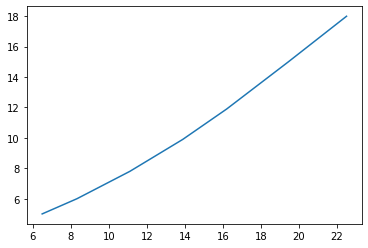

In [12]:
"""min_dist_lookup = [ 
    (6.5, 4.), # 14.5 mph
    (8.33, 5.0), #18 mph (speed mps, wp dist m)
    (11.11, 6.7), # 24 mph
    (13.89, 8.5), # 30 mph
    (16.2, 10.1), # 36 mph
    (19.44, 12.6), # 43 mph
    (22.5, 15.), # 50 mph
]"""
min_dist_lookup = [ 
    (6.5, 5.), # 14.5 mph
    (8.33, 6.0), #18 mph (speed mps, wp dist m)
    (11.11, 7.8), # 24 mph
    (13.89, 9.9), # 30 mph
    (16.2, 11.9), # 36 mph
    (19.44, 15), # 43 mph
    (22.5, 18.), # 50 mph
]

min_dist_bps = [x[0] for x in min_dist_lookup]
min_dist_vals = [x[1] for x in min_dist_lookup]

plt.plot(min_dist_bps, min_dist_vals)


In [ ]:
min_dist_lookup = [ # 3.29
    (6.5, 4.), # 14.5 mph
    (8.33, 5.1), #18 mph (speed mps, wp dist m)
    (11.11, 6.5), # 24 mph
    (13.89, 8), # 30 mph
    (16.2, 9.3), # 36 mph
    (19.44, 11.5), # 43 mph
    (22.5, 13.5), # 50 mph
]

In [7]:
np.tan(.5)

0.5463024898437905

In [54]:
tire_angle = .4
WHEELBASE = 1.8 #2.66
speed = mph_to_mps(10)

curvature = tire_angle/WHEELBASE # rad/m 
vehicle_turn_rate_sec = curvature * speed # rad/sec
future_vehicle_heading = vehicle_turn_rate_sec * .05
future_vehicle_heading

0.04967111111111111

In [55]:
dist_car_travelled_during_lag = speed / 20.
dist_car_travelled_during_lag

0.22352

In [56]:
r = dist_car_travelled_during_lag / future_vehicle_heading # radius of the circle around which ego is turning m/rad
r

4.5

In [57]:
# correct way
future_vehicle_y = np.sin(future_vehicle_heading)*r
future_vehicle_x = r - (np.cos(future_vehicle_heading)*r)
future_vehicle_x, future_vehicle_y

(0.005550102127081402, 0.22342809919549694)

In [58]:
a = future_vehicle_heading/2
x = dist_car_travelled_during_lag*np.cos(a)
y = (dist_car_travelled_during_lag*np.sin(a))
x, y

(0.2234510694365123, 0.005550672723098684)

In [11]:
4/6.5

0.6153846153846154

In [4]:
mps_to_mph(6.7)

14.987498000000002

In [19]:
ACCELERATION_DUE_TO_GRAVITY = 9.8
roll = .03
sf = 1/401
u = 20

m = 1700
l = 2.66
aF = l * .41
aR = l - aF
tire_stiffness_factor = .677
cF, cR = tire_stiffness_factor, tire_stiffness_factor
sf = m * (cF*aF - cR*aR) / (l**2 * cF * cR)

In [22]:
(cF*aF - cR*aR)

-0.3241476

In [20]:
sf

-169.92259081973765

In [21]:
roll_compensation = (ACCELERATION_DUE_TO_GRAVITY * roll) / ((1 / sf) - u**2)
#roll_compensation = (ACCELERATION_DUE_TO_GRAVITY * roll) / u**2
roll_compensation

-0.0007349891864115468

In [197]:
roll_compensation_angles = CRV_WHEELBASE * roll_compensation
roll_compensation_angles

0.0019551

In [198]:
from traj_utils import *
tire_angles_to_max_speeds(.02), tire_angles_to_max_speeds(.02-roll_compensation_angles)

(14.18929668510425, 14.934187811096537)

In [3]:
# set lr
set_lr(1e-4)

In [37]:
dataloader_root = f"{BLENDER_MEMBANK_ROOT}/dataloader_06"
current_run = np.load(f"{dataloader_root}/run_counter.npy")[0]
current_run

40